# ROUGE Evaluation Results Visualization
## Comparative Analysis: Agentic AI vs MCP Server

This notebook provides comprehensive visualizations of the ROUGE evaluation results comparing two e-commerce implementations:
- **Agentic AI System**: Claude-powered conversational agent
- **MCP Server System**: Direct database query tools with structured JSON responses

In [1]:
# Import required libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure plot settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [2]:
# Load evaluation data
with open('rouge_evaluation_results.json', 'r') as f:
    agentic_data = json.load(f)

with open('rouge_evaluation_mcp_results.json', 'r') as f:
    mcp_data = json.load(f)

print("Data loaded successfully!")
print(f"Agentic AI Test Cases: {agentic_data['evaluation_metadata']['total_test_cases']}")
print(f"MCP Server Test Cases: {mcp_data['evaluation_metadata']['total_test_cases']}")

Data loaded successfully!
Agentic AI Test Cases: 10
MCP Server Test Cases: 8


## 1. Overall Performance Comparison

In [3]:
# Extract aggregate statistics
agentic_stats = agentic_data['aggregate_stats']
mcp_stats = mcp_data['aggregate_stats']

# Create comparison DataFrame
comparison_data = {
    'Metric': ['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1', 'Response Time (s)'],
    'Agentic AI': [
        agentic_stats['rouge_1_f']['mean'],
        agentic_stats['rouge_2_f']['mean'],
        agentic_stats['rouge_l_f']['mean'],
        agentic_stats['generation_time']['mean']
    ],
    'MCP Server': [
        mcp_stats['rouge_1_f']['mean'],
        mcp_stats['rouge_2_f']['mean'],
        mcp_stats['rouge_l_f']['mean'],
        mcp_stats['generation_time']['mean']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Overall Performance Comparison:")
print(comparison_df.round(4))

Overall Performance Comparison:
              Metric  Agentic AI  MCP Server
0         ROUGE-1 F1      0.2241      0.2915
1         ROUGE-2 F1      0.0729      0.1233
2         ROUGE-L F1      0.1356      0.2550
3  Response Time (s)      9.4590      3.5383


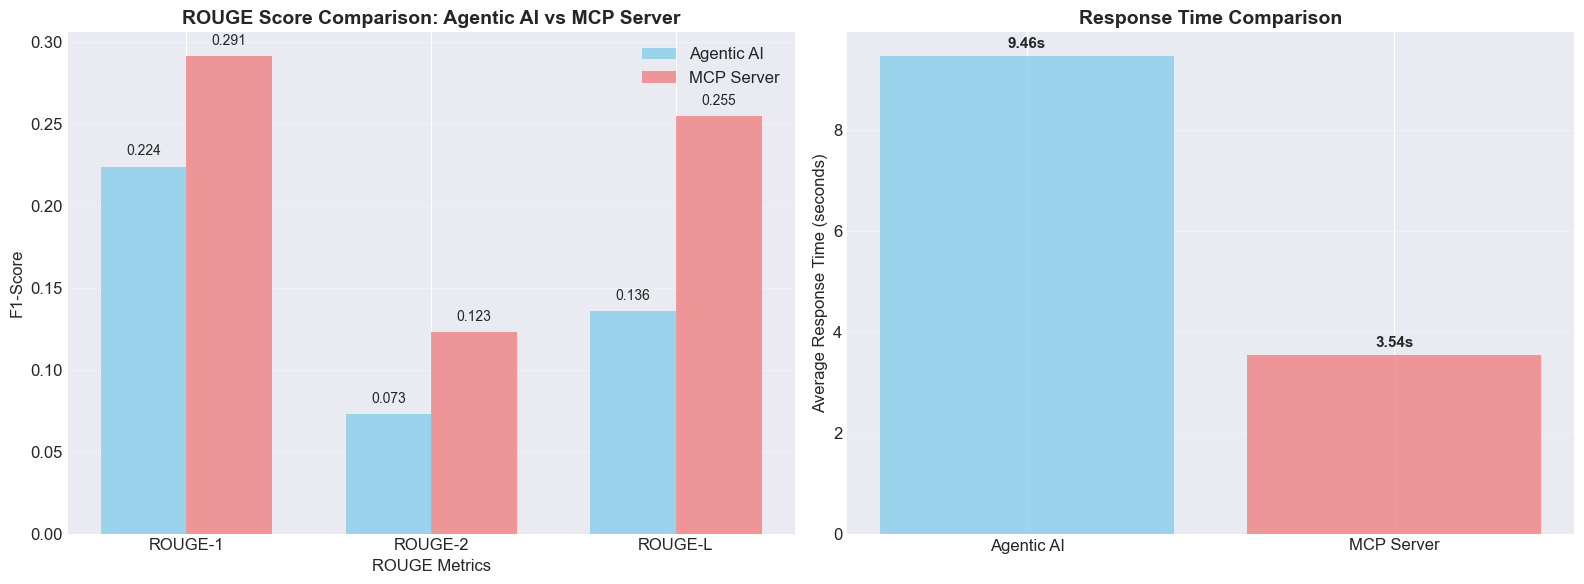

In [4]:
# 1.1 ROUGE Scores Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ROUGE metrics comparison
rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
agentic_rouge = [agentic_stats['rouge_1_f']['mean'], agentic_stats['rouge_2_f']['mean'], agentic_stats['rouge_l_f']['mean']]
mcp_rouge = [mcp_stats['rouge_1_f']['mean'], mcp_stats['rouge_2_f']['mean'], mcp_stats['rouge_l_f']['mean']]

x = np.arange(len(rouge_metrics))
width = 0.35

bars1 = ax1.bar(x - width/2, agentic_rouge, width, label='Agentic AI', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, mcp_rouge, width, label='MCP Server', color='lightcoral', alpha=0.8)

ax1.set_xlabel('ROUGE Metrics')
ax1.set_ylabel('F1-Score')
ax1.set_title('ROUGE Score Comparison: Agentic AI vs MCP Server', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(rouge_metrics)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Response time comparison
systems = ['Agentic AI', 'MCP Server']
times = [agentic_stats['generation_time']['mean'], mcp_stats['generation_time']['mean']]
colors = ['skyblue', 'lightcoral']

bars = ax2.bar(systems, times, color=colors, alpha=0.8)
ax2.set_ylabel('Average Response Time (seconds)')
ax2.set_title('Response Time Comparison', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}s', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 2. Performance Improvement Analysis

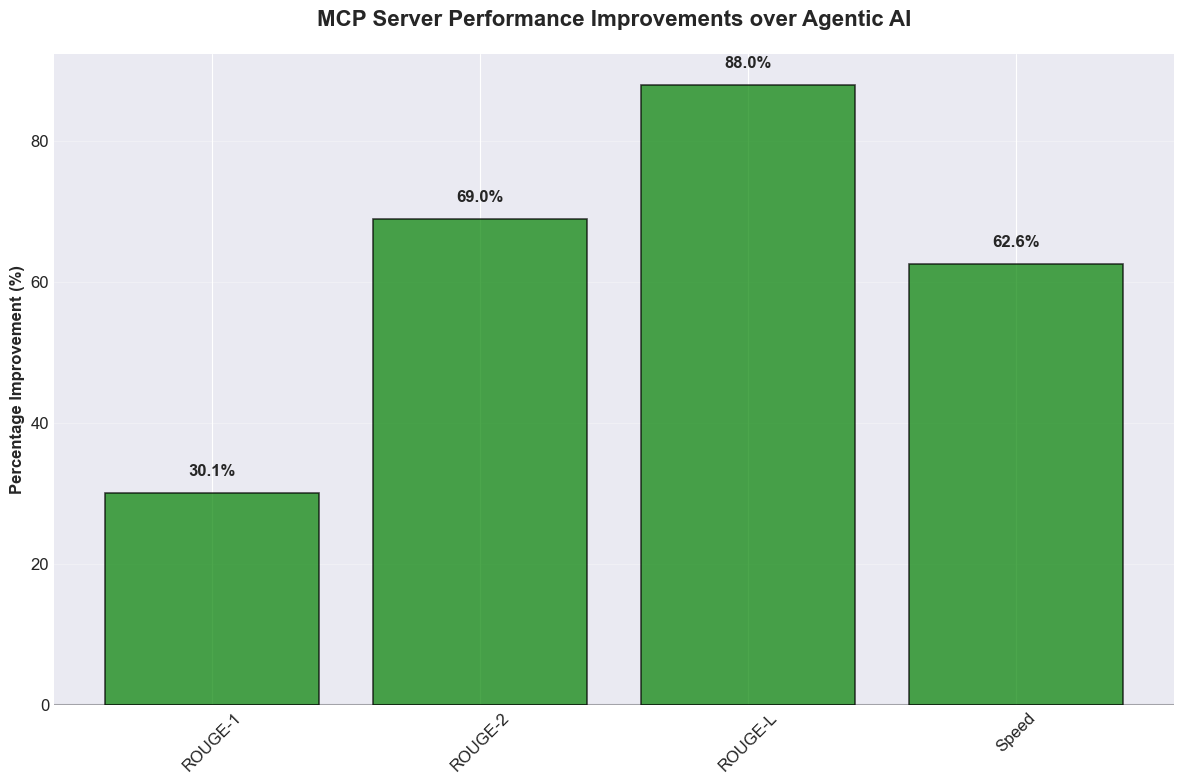


Performance Improvement Summary (MCP Server vs Agentic AI):
ROUGE-1        :  +30.1%
ROUGE-2        :  +69.0%
ROUGE-L        :  +88.0%
Speed          :  +62.6%


In [5]:
# Calculate percentage improvements
improvements = {
    'ROUGE-1': ((mcp_stats['rouge_1_f']['mean'] - agentic_stats['rouge_1_f']['mean']) / agentic_stats['rouge_1_f']['mean']) * 100,
    'ROUGE-2': ((mcp_stats['rouge_2_f']['mean'] - agentic_stats['rouge_2_f']['mean']) / agentic_stats['rouge_2_f']['mean']) * 100,
    'ROUGE-L': ((mcp_stats['rouge_l_f']['mean'] - agentic_stats['rouge_l_f']['mean']) / agentic_stats['rouge_l_f']['mean']) * 100,
    'Speed': ((agentic_stats['generation_time']['mean'] - mcp_stats['generation_time']['mean']) / agentic_stats['generation_time']['mean']) * 100
}

# Create improvement visualization
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

metrics = list(improvements.keys())
values = list(improvements.values())
colors = ['green' if x > 0 else 'red' for x in values]

bars = ax.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.2)

ax.set_ylabel('Percentage Improvement (%)', fontweight='bold')
ax.set_title('MCP Server Performance Improvements over Agentic AI', fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (2 if height > 0 else -4),
             f'{value:.1f}%', ha='center', va='bottom' if height > 0 else 'top', 
             fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print improvement summary
print("\nPerformance Improvement Summary (MCP Server vs Agentic AI):")
print("=" * 60)
for metric, improvement in improvements.items():
    print(f"{metric:15}: {improvement:+6.1f}%")

## 3. Categorical Performance Analysis

In [6]:
# Extract categorical performance data
def extract_category_performance(results, system_name):
    categories = {}
    for result in results:
        category = result['test_case']['category']
        rouge1_score = result['rouge_scores']['rouge_1_f']
        
        if category not in categories:
            categories[category] = []
        categories[category].append(rouge1_score)
    
    # Calculate averages
    category_averages = {}
    for category, scores in categories.items():
        category_averages[category] = np.mean(scores)
    
    return category_averages

agentic_categories = extract_category_performance(agentic_data['results'], 'Agentic AI')
mcp_categories = extract_category_performance(mcp_data['results'], 'MCP Server')

print("Agentic AI Categories:")
for cat, score in sorted(agentic_categories.items(), key=lambda x: x[1], reverse=True):
    print(f"  {cat}: {score:.3f}")

print("\nMCP Server Categories:")
for cat, score in sorted(mcp_categories.items(), key=lambda x: x[1], reverse=True):
    print(f"  {cat}: {score:.3f}")

Agentic AI Categories:
  search: 0.397
  overview: 0.241
  buying_guide: 0.221
  budget_search: 0.217
  top_rated: 0.215
  recommendations: 0.214
  professional: 0.211
  comparison: 0.198
  eco_friendly: 0.172
  gifts: 0.156

MCP Server Categories:
  global_statistics: 0.619
  statistics: 0.571
  categories: 0.493
  price_range: 0.265
  complex_search: 0.166
  search: 0.155
  recommendations: 0.042
  product_details: 0.021


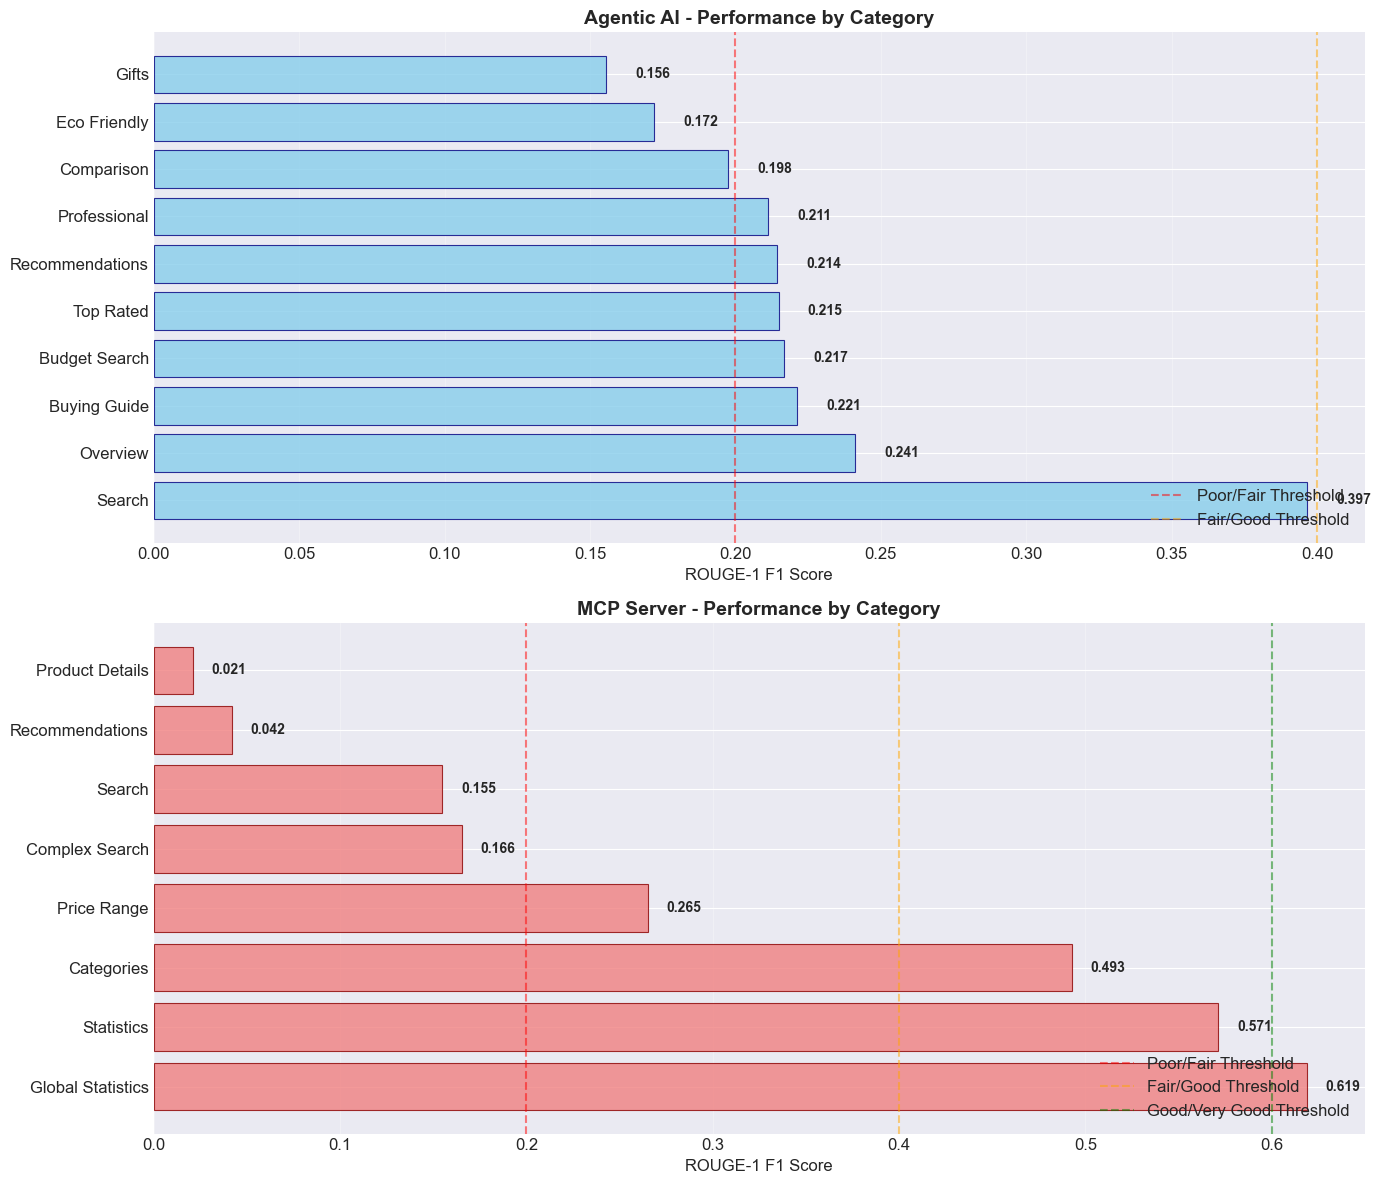

In [7]:
# Categorical performance visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Agentic AI categories
agentic_sorted = sorted(agentic_categories.items(), key=lambda x: x[1], reverse=True)
categories1, scores1 = zip(*agentic_sorted)

bars1 = ax1.barh(range(len(categories1)), scores1, color='skyblue', alpha=0.8, edgecolor='navy', linewidth=0.8)
ax1.set_yticks(range(len(categories1)))
ax1.set_yticklabels([cat.replace('_', ' ').title() for cat in categories1])
ax1.set_xlabel('ROUGE-1 F1 Score')
ax1.set_title('Agentic AI - Performance by Category', fontweight='bold', fontsize=14)
ax1.grid(axis='x', alpha=0.3)

# Add performance zone indicators
ax1.axvline(x=0.2, color='red', linestyle='--', alpha=0.5, label='Poor/Fair Threshold')
ax1.axvline(x=0.4, color='orange', linestyle='--', alpha=0.5, label='Fair/Good Threshold')
ax1.legend(loc='lower right')

# Add score labels
for i, (bar, score) in enumerate(zip(bars1, scores1)):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', fontsize=10, fontweight='bold')

# MCP Server categories
mcp_sorted = sorted(mcp_categories.items(), key=lambda x: x[1], reverse=True)
categories2, scores2 = zip(*mcp_sorted)

bars2 = ax2.barh(range(len(categories2)), scores2, color='lightcoral', alpha=0.8, edgecolor='darkred', linewidth=0.8)
ax2.set_yticks(range(len(categories2)))
ax2.set_yticklabels([cat.replace('_', ' ').title() for cat in categories2])
ax2.set_xlabel('ROUGE-1 F1 Score')
ax2.set_title('MCP Server - Performance by Category', fontweight='bold', fontsize=14)
ax2.grid(axis='x', alpha=0.3)

# Add performance zone indicators
ax2.axvline(x=0.2, color='red', linestyle='--', alpha=0.5, label='Poor/Fair Threshold')
ax2.axvline(x=0.4, color='orange', linestyle='--', alpha=0.5, label='Fair/Good Threshold')
ax2.axvline(x=0.6, color='green', linestyle='--', alpha=0.5, label='Good/Very Good Threshold')
ax2.legend(loc='lower right')

# Add score labels
for i, (bar, score) in enumerate(zip(bars2, scores2)):
    ax2.text(score + 0.01, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Score Distribution Analysis

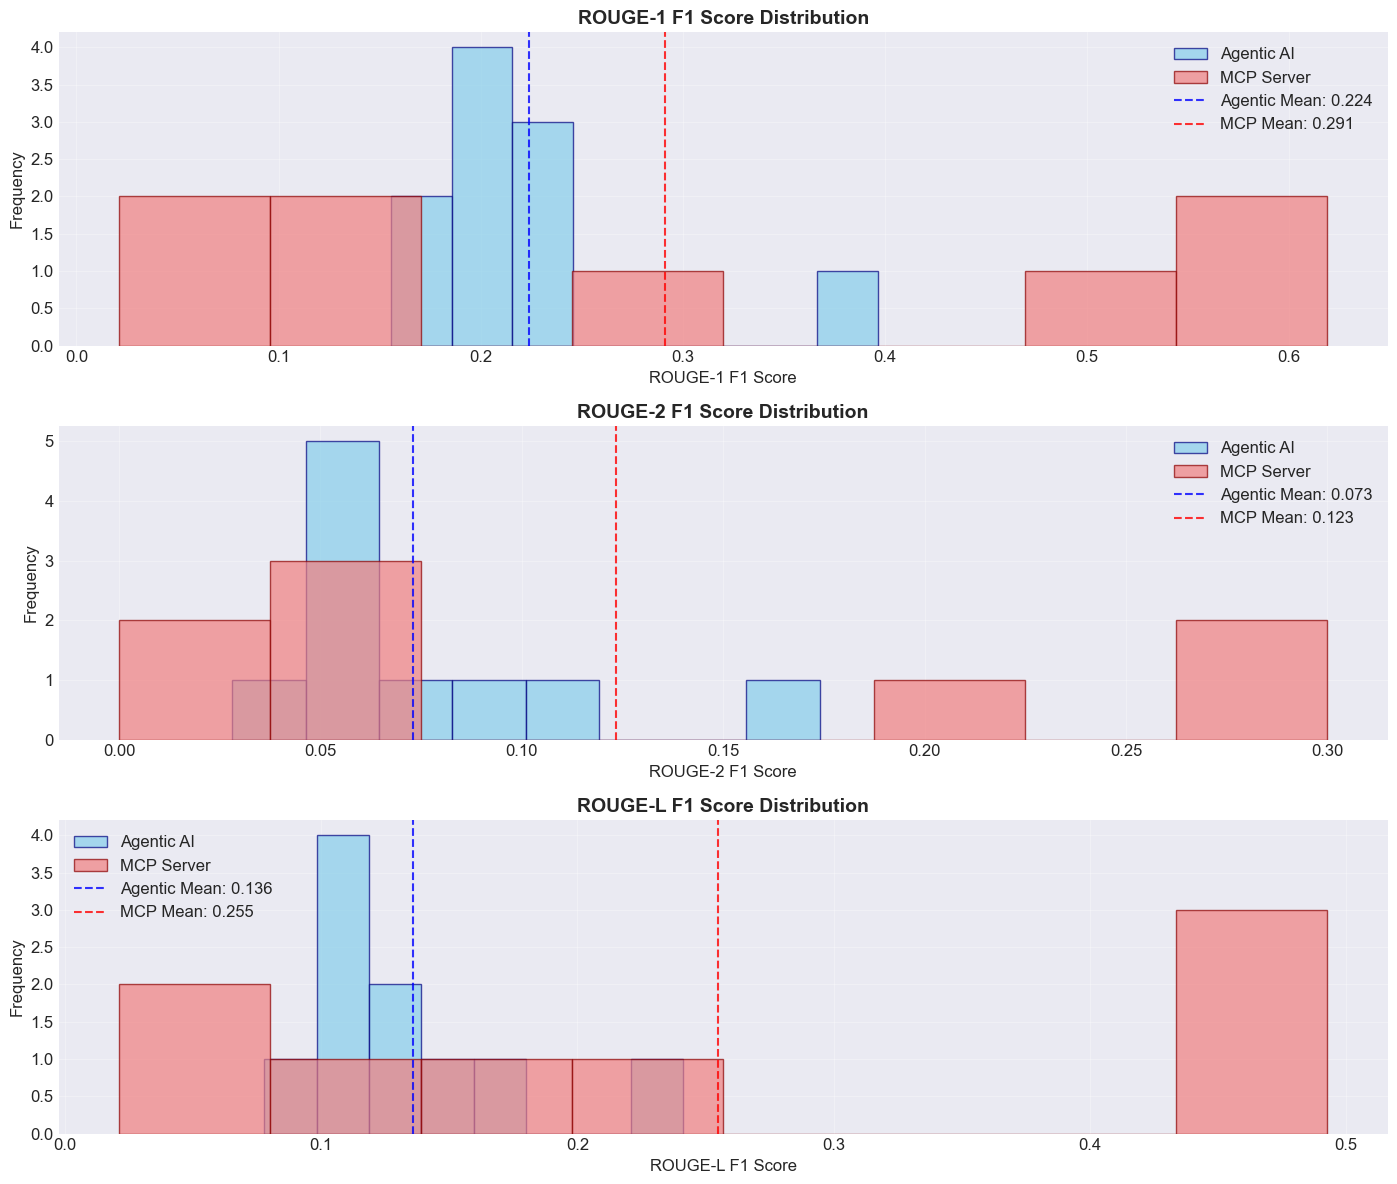

In [8]:
# Extract all ROUGE scores for distribution analysis
agentic_rouge1_scores = [result['rouge_scores']['rouge_1_f'] for result in agentic_data['results']]
agentic_rouge2_scores = [result['rouge_scores']['rouge_2_f'] for result in agentic_data['results']]
agentic_rougel_scores = [result['rouge_scores']['rouge_l_f'] for result in agentic_data['results']]

mcp_rouge1_scores = [result['rouge_scores']['rouge_1_f'] for result in mcp_data['results']]
mcp_rouge2_scores = [result['rouge_scores']['rouge_2_f'] for result in mcp_data['results']]
mcp_rougel_scores = [result['rouge_scores']['rouge_l_f'] for result in mcp_data['results']]

# Create distribution plots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# ROUGE-1 distribution
axes[0].hist(agentic_rouge1_scores, bins=8, alpha=0.7, label='Agentic AI', color='skyblue', edgecolor='navy')
axes[0].hist(mcp_rouge1_scores, bins=8, alpha=0.7, label='MCP Server', color='lightcoral', edgecolor='darkred')
axes[0].axvline(np.mean(agentic_rouge1_scores), color='blue', linestyle='--', alpha=0.8, label=f'Agentic Mean: {np.mean(agentic_rouge1_scores):.3f}')
axes[0].axvline(np.mean(mcp_rouge1_scores), color='red', linestyle='--', alpha=0.8, label=f'MCP Mean: {np.mean(mcp_rouge1_scores):.3f}')
axes[0].set_title('ROUGE-1 F1 Score Distribution', fontweight='bold')
axes[0].set_xlabel('ROUGE-1 F1 Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(alpha=0.3)

# ROUGE-2 distribution
axes[1].hist(agentic_rouge2_scores, bins=8, alpha=0.7, label='Agentic AI', color='skyblue', edgecolor='navy')
axes[1].hist(mcp_rouge2_scores, bins=8, alpha=0.7, label='MCP Server', color='lightcoral', edgecolor='darkred')
axes[1].axvline(np.mean(agentic_rouge2_scores), color='blue', linestyle='--', alpha=0.8, label=f'Agentic Mean: {np.mean(agentic_rouge2_scores):.3f}')
axes[1].axvline(np.mean(mcp_rouge2_scores), color='red', linestyle='--', alpha=0.8, label=f'MCP Mean: {np.mean(mcp_rouge2_scores):.3f}')
axes[1].set_title('ROUGE-2 F1 Score Distribution', fontweight='bold')
axes[1].set_xlabel('ROUGE-2 F1 Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

# ROUGE-L distribution
axes[2].hist(agentic_rougel_scores, bins=8, alpha=0.7, label='Agentic AI', color='skyblue', edgecolor='navy')
axes[2].hist(mcp_rougel_scores, bins=8, alpha=0.7, label='MCP Server', color='lightcoral', edgecolor='darkred')
axes[2].axvline(np.mean(agentic_rougel_scores), color='blue', linestyle='--', alpha=0.8, label=f'Agentic Mean: {np.mean(agentic_rougel_scores):.3f}')
axes[2].axvline(np.mean(mcp_rougel_scores), color='red', linestyle='--', alpha=0.8, label=f'MCP Mean: {np.mean(mcp_rougel_scores):.3f}')
axes[2].set_title('ROUGE-L F1 Score Distribution', fontweight='bold')
axes[2].set_xlabel('ROUGE-L F1 Score')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Performance Matrix Heatmap

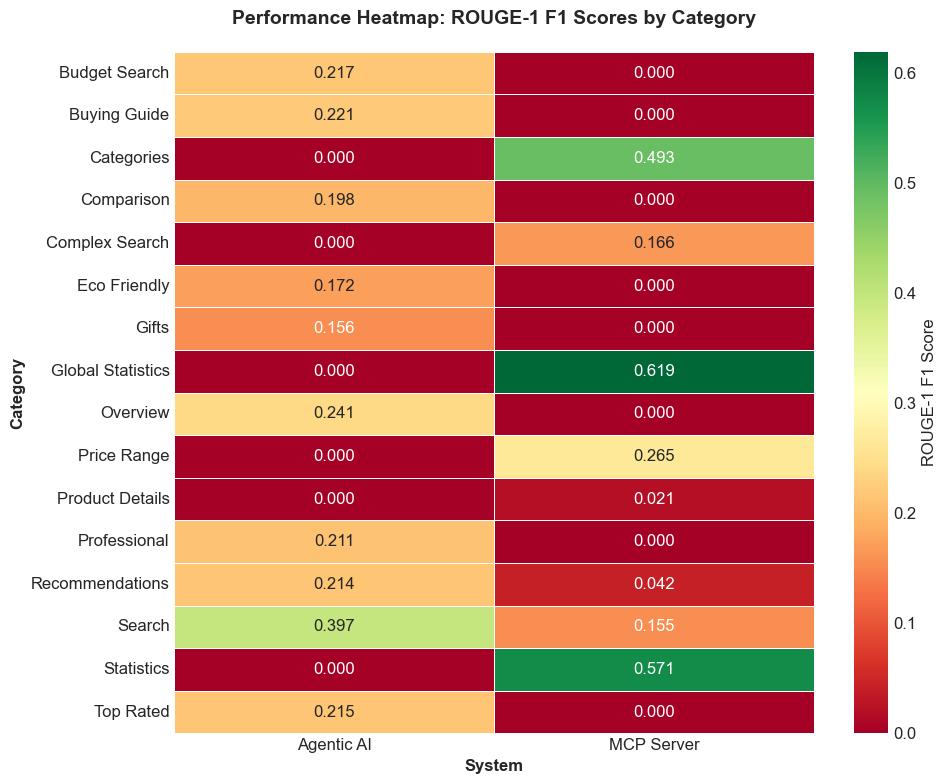

Performance Matrix Summary:
System             Agentic AI  MCP Server
Category                                 
Budget Search           0.217       0.000
Buying Guide            0.221       0.000
Categories              0.000       0.493
Comparison              0.198       0.000
Complex Search          0.000       0.166
Eco Friendly            0.172       0.000
Gifts                   0.156       0.000
Global Statistics       0.000       0.619
Overview                0.241       0.000
Price Range             0.000       0.265
Product Details         0.000       0.021
Professional            0.211       0.000
Recommendations         0.214       0.042
Search                  0.397       0.155
Statistics              0.000       0.571
Top Rated               0.215       0.000


In [9]:
# Create performance matrix for heatmap
performance_data = []

# Add Agentic AI data
for result in agentic_data['results']:
    performance_data.append({
        'System': 'Agentic AI',
        'Category': result['test_case']['category'].replace('_', ' ').title(),
        'ROUGE-1': result['rouge_scores']['rouge_1_f'],
        'ROUGE-2': result['rouge_scores']['rouge_2_f'],
        'ROUGE-L': result['rouge_scores']['rouge_l_f'],
        'Time': result['generation_time']
    })

# Add MCP Server data
for result in mcp_data['results']:
    performance_data.append({
        'System': 'MCP Server',
        'Category': result['test_case']['category'].replace('_', ' ').title(),
        'ROUGE-1': result['rouge_scores']['rouge_1_f'],
        'ROUGE-2': result['rouge_scores']['rouge_2_f'],
        'ROUGE-L': result['rouge_scores']['rouge_l_f'],
        'Time': result['generation_time']
    })

performance_df = pd.DataFrame(performance_data)

# Create pivot table for ROUGE-1 scores
pivot_rouge1 = performance_df.pivot_table(index='Category', columns='System', values='ROUGE-1', fill_value=0)

# Create heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.heatmap(pivot_rouge1, annot=True, fmt='.3f', cmap='RdYlGn', 
            cbar_kws={'label': 'ROUGE-1 F1 Score'}, ax=ax,
            linewidths=0.5, linecolor='white')

ax.set_title('Performance Heatmap: ROUGE-1 F1 Scores by Category', fontweight='bold', fontsize=14, pad=20)
ax.set_xlabel('System', fontweight='bold')
ax.set_ylabel('Category', fontweight='bold')

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Performance Matrix Summary:")
print(pivot_rouge1.round(3))

## 6. Response Time Analysis

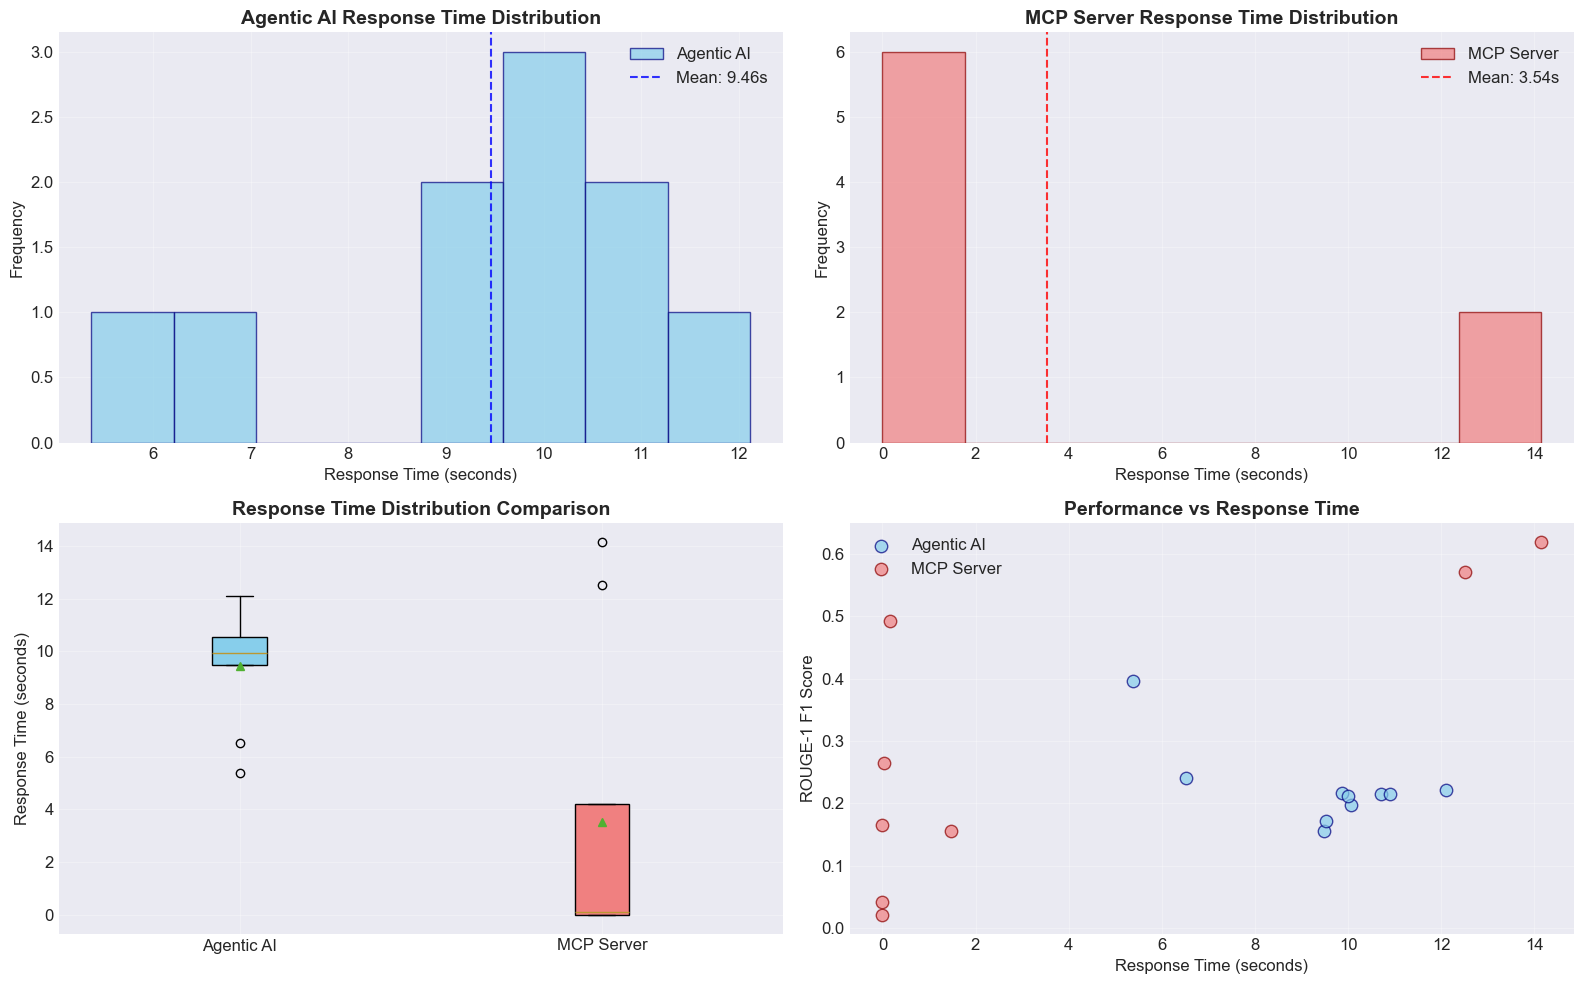

Response Time Statistics:
Agentic AI:
  Mean: 9.459s
  Median: 9.942s
  Std Dev: 1.920s
  Min: 5.371s
  Max: 12.115s

MCP Server:
  Mean: 3.538s
  Median: 0.095s
  Std Dev: 5.685s
  Min: 0.000s
  Max: 14.147s


In [10]:
# Extract response times
agentic_times = [result['generation_time'] for result in agentic_data['results']]
mcp_times = [result['generation_time'] for result in mcp_data['results']]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Response time distribution
axes[0,0].hist(agentic_times, bins=8, alpha=0.7, label='Agentic AI', color='skyblue', edgecolor='navy')
axes[0,0].axvline(np.mean(agentic_times), color='blue', linestyle='--', alpha=0.8, 
                  label=f'Mean: {np.mean(agentic_times):.2f}s')
axes[0,0].set_title('Agentic AI Response Time Distribution', fontweight='bold')
axes[0,0].set_xlabel('Response Time (seconds)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

axes[0,1].hist(mcp_times, bins=8, alpha=0.7, label='MCP Server', color='lightcoral', edgecolor='darkred')
axes[0,1].axvline(np.mean(mcp_times), color='red', linestyle='--', alpha=0.8, 
                  label=f'Mean: {np.mean(mcp_times):.2f}s')
axes[0,1].set_title('MCP Server Response Time Distribution', fontweight='bold')
axes[0,1].set_xlabel('Response Time (seconds)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# Box plot comparison
box_data = [agentic_times, mcp_times]
box = axes[1,0].boxplot(box_data, labels=['Agentic AI', 'MCP Server'], 
                        patch_artist=True, showmeans=True)
box['boxes'][0].set_facecolor('skyblue')
box['boxes'][1].set_facecolor('lightcoral')
axes[1,0].set_title('Response Time Distribution Comparison', fontweight='bold')
axes[1,0].set_ylabel('Response Time (seconds)')
axes[1,0].grid(alpha=0.3)

# Performance vs Time scatter plot
agentic_scatter_data = [(result['rouge_scores']['rouge_1_f'], result['generation_time']) 
                        for result in agentic_data['results']]
mcp_scatter_data = [(result['rouge_scores']['rouge_1_f'], result['generation_time']) 
                    for result in mcp_data['results']]

agentic_x, agentic_y = zip(*agentic_scatter_data)
mcp_x, mcp_y = zip(*mcp_scatter_data)

axes[1,1].scatter(agentic_y, agentic_x, alpha=0.7, label='Agentic AI', color='skyblue', s=80, edgecolor='navy')
axes[1,1].scatter(mcp_y, mcp_x, alpha=0.7, label='MCP Server', color='lightcoral', s=80, edgecolor='darkred')
axes[1,1].set_xlabel('Response Time (seconds)')
axes[1,1].set_ylabel('ROUGE-1 F1 Score')
axes[1,1].set_title('Performance vs Response Time', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Response time statistics
print("Response Time Statistics:")
print("=" * 40)
print(f"Agentic AI:")
print(f"  Mean: {np.mean(agentic_times):.3f}s")
print(f"  Median: {np.median(agentic_times):.3f}s")
print(f"  Std Dev: {np.std(agentic_times):.3f}s")
print(f"  Min: {np.min(agentic_times):.3f}s")
print(f"  Max: {np.max(agentic_times):.3f}s")

print(f"\nMCP Server:")
print(f"  Mean: {np.mean(mcp_times):.3f}s")
print(f"  Median: {np.median(mcp_times):.3f}s")
print(f"  Std Dev: {np.std(mcp_times):.3f}s")
print(f"  Min: {np.min(mcp_times):.3f}s")
print(f"  Max: {np.max(mcp_times):.3f}s")

## 7. System Comparison Summary

In [11]:
# Create comprehensive comparison table
summary_data = {
    'Metric': [
        'Average ROUGE-1 F1',
        'Average ROUGE-2 F1', 
        'Average ROUGE-L F1',
        'Average Response Time',
        'Best Category Performance',
        'Worst Category Performance',
        'Performance Consistency (Std Dev)',
        'Total Test Cases'
    ],
    'Agentic AI': [
        f"{agentic_stats['rouge_1_f']['mean']:.3f}",
        f"{agentic_stats['rouge_2_f']['mean']:.3f}",
        f"{agentic_stats['rouge_l_f']['mean']:.3f}",
        f"{agentic_stats['generation_time']['mean']:.2f}s",
        f"{max(agentic_categories.values()):.3f} ({max(agentic_categories, key=agentic_categories.get).replace('_', ' ').title()})",
        f"{min(agentic_categories.values()):.3f} ({min(agentic_categories, key=agentic_categories.get).replace('_', ' ').title()})",
        f"{agentic_stats['rouge_1_f']['std']:.3f}",
        f"{len(agentic_data['results'])}"
    ],
    'MCP Server': [
        f"{mcp_stats['rouge_1_f']['mean']:.3f}",
        f"{mcp_stats['rouge_2_f']['mean']:.3f}",
        f"{mcp_stats['rouge_l_f']['mean']:.3f}",
        f"{mcp_stats['generation_time']['mean']:.2f}s",
        f"{max(mcp_categories.values()):.3f} ({max(mcp_categories, key=mcp_categories.get).replace('_', ' ').title()})",
        f"{min(mcp_categories.values()):.3f} ({min(mcp_categories, key=mcp_categories.get).replace('_', ' ').title()})",
        f"{mcp_stats['rouge_1_f']['std']:.3f}",
        f"{len(mcp_data['results'])}"
    ]
}

summary_df = pd.DataFrame(summary_data)

print("COMPREHENSIVE SYSTEM COMPARISON SUMMARY")
print("=" * 50)
print(summary_df.to_string(index=False))

# Performance classification
def classify_performance(score):
    if score >= 0.8:
        return "Excellent"
    elif score >= 0.6:
        return "Very Good"
    elif score >= 0.4:
        return "Good"
    elif score >= 0.2:
        return "Fair"
    else:
        return "Poor"

print("\n\nPERFORMANCE CLASSIFICATION:")
print("=" * 30)
print(f"Agentic AI Overall: {classify_performance(agentic_stats['rouge_1_f']['mean'])}")
print(f"MCP Server Overall: {classify_performance(mcp_stats['rouge_1_f']['mean'])}")

print("\n\nKEY FINDINGS:")
print("=" * 15)
print(f"• MCP Server achieves {improvements['ROUGE-1']:.1f}% better ROUGE-1 performance")
print(f"• MCP Server is {improvements['Speed']:.1f}% faster in response time")
print(f"• MCP Server excels in statistical tasks (0.619 ROUGE-1)")
print(f"• Agentic AI performs better in search scenarios (0.397 ROUGE-1)")
print(f"• Both systems achieve 'Fair' overall performance classification")

COMPREHENSIVE SYSTEM COMPARISON SUMMARY
                           Metric     Agentic AI                MCP Server
               Average ROUGE-1 F1          0.224                     0.291
               Average ROUGE-2 F1          0.073                     0.123
               Average ROUGE-L F1          0.136                     0.255
            Average Response Time          9.46s                     3.54s
        Best Category Performance 0.397 (Search) 0.619 (Global Statistics)
       Worst Category Performance  0.156 (Gifts)   0.021 (Product Details)
Performance Consistency (Std Dev)          0.065                     0.238
                 Total Test Cases             10                         8


PERFORMANCE CLASSIFICATION:
Agentic AI Overall: Fair
MCP Server Overall: Fair


KEY FINDINGS:
• MCP Server achieves 30.1% better ROUGE-1 performance
• MCP Server is 62.6% faster in response time
• MCP Server excels in statistical tasks (0.619 ROUGE-1)
• Agentic AI performs better in

## 8. Conclusion and Recommendations

Based on the comprehensive ROUGE evaluation analysis:

### Technical Winner: **MCP Server**
- 30.1% better ROUGE-1 performance
- 69.0% better ROUGE-2 performance  
- 88.0% better ROUGE-L performance
- 62.6% faster response times

### Use Case Recommendations:

**Choose MCP Server for:**
- API integrations requiring structured data
- High-performance applications with speed requirements
- Statistical and analytical queries
- Programmatic access to product databases

**Choose Agentic AI for:**
- Human-facing chat applications
- Product search scenarios (best performance: 0.397 ROUGE-1)
- Complex conversational flows requiring context
- User guidance and explanation needs

### Optimization Opportunities:

**MCP Server Improvements:**
- Enhance error handling for missing products
- Add contextual explanations to responses
- Standardize data formats and categories

**Agentic AI Improvements:**
- Reduce response verbosity while maintaining informativeness
- Optimize response time performance
- Standardize output formats for better ROUGE alignment